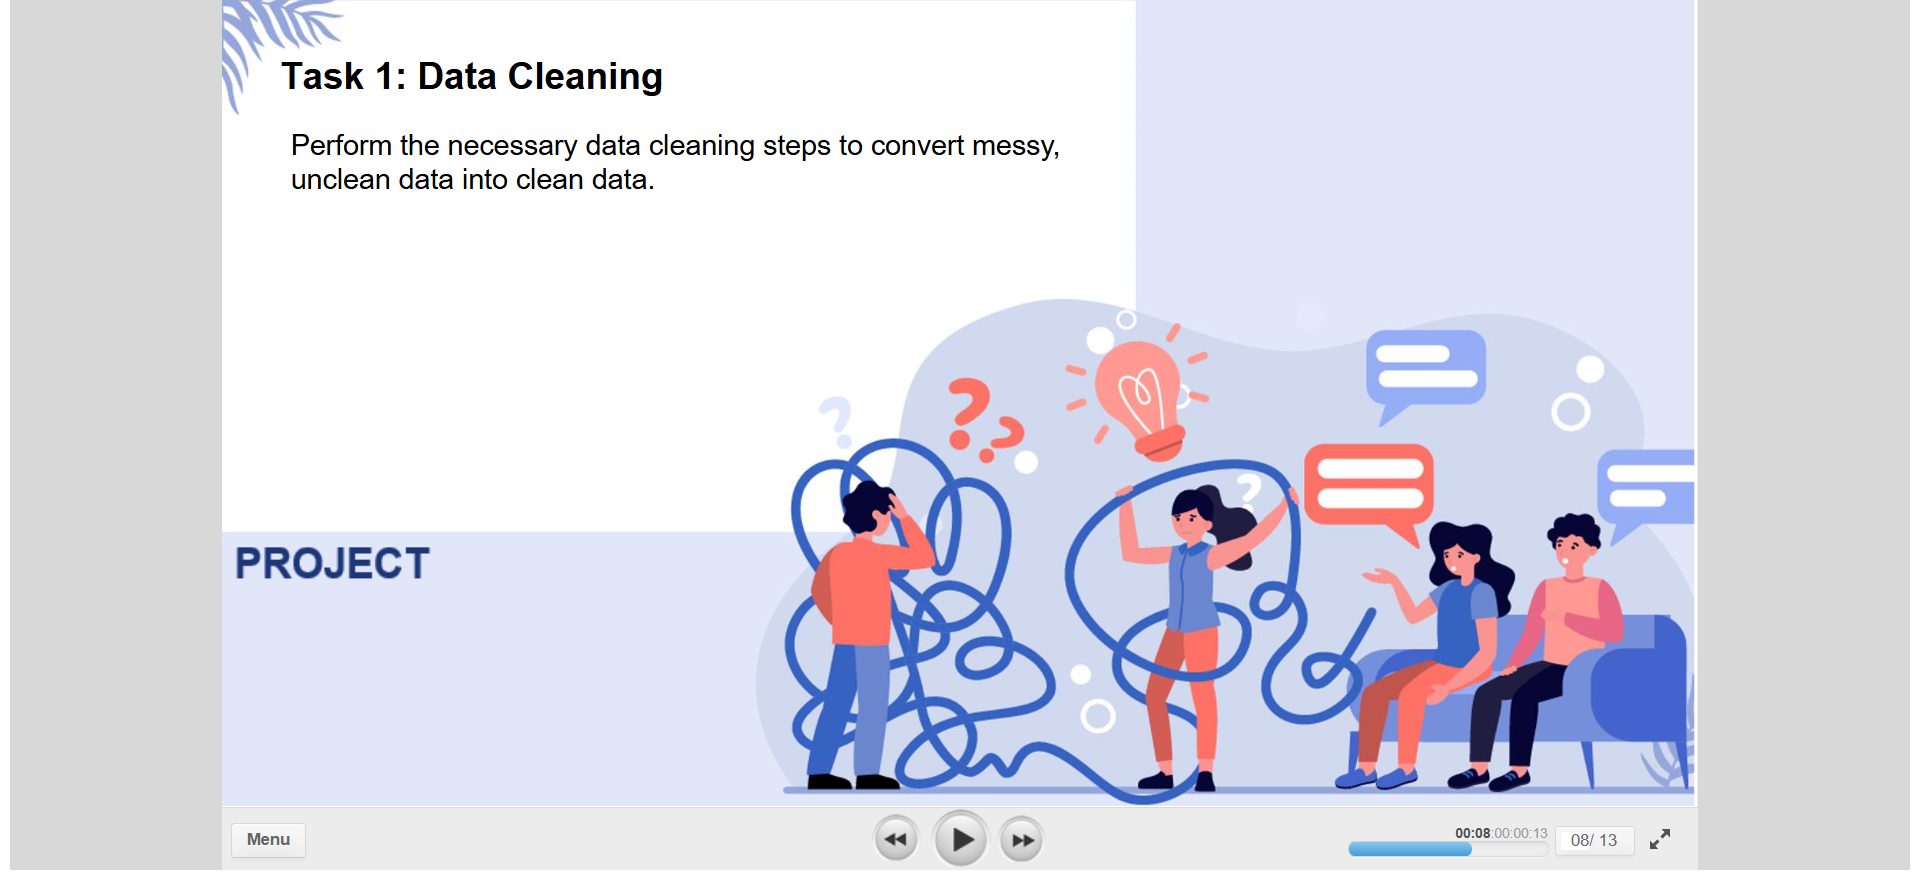

In [3]:
# => In general, you have to import these libraries. Not every category will be imported in every project
import numpy as np
import pandas as pd
# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# loaded the dataset
df=pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv',sep=';')
# replace column name with _
df.columns=df.columns.str.replace(' ','_')
df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [7]:
df.shape# structure of the dataset

(740, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [11]:

df['Day_of_the_week']=df['Day_of_the_week'].replace({2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday'})
df['Seasons']=df['Seasons'].replace({1:'Summer',2:'Autumn',3:'Winter',4:'Spring'})
df['Disciplinary_failure']=df['Disciplinary_failure'].replace({0:'No',1:'Yes'})
df['Education']=df['Education'].replace({1:'high_school',2:'graduate',3:'postgraduate',4:' master_and_doctor'})
df['Son']=df['Son'].replace({0:'no',1:'one_son',2:'two_son',3:'three_son',4:'four_son'})
df['Social_drinker']=df['Social_drinker'].replace({1:'yes',0:'no'})
df['Social_smoker']=df['Social_smoker'].replace({1:'yes',0:'no'})
df['Pet']=df['Pet'].replace({1:'a_pet',0:'no_pet',2:'two_pet',4:'four_pet',5:'five_pet',8:'eight_pet'})

In [13]:
df['Pet'].unique()# checking

array(['a_pet', 'no_pet', 'four_pet', 'two_pet', 'five_pet', 'eight_pet'],
      dtype=object)

In [15]:
df.info()# info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    object 
 4   Seasons                          740 non-null    object 
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    object 
 12  Education             

In [17]:
p=df.select_dtypes(include='object')
for x in p:
    df[x]=df[x].astype('category')

In [19]:
df.info()# info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average/day_           740 non-null    float64 
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    category
 12  Educatio

# check outliers

In [22]:
import matplotlib.pyplot as plt

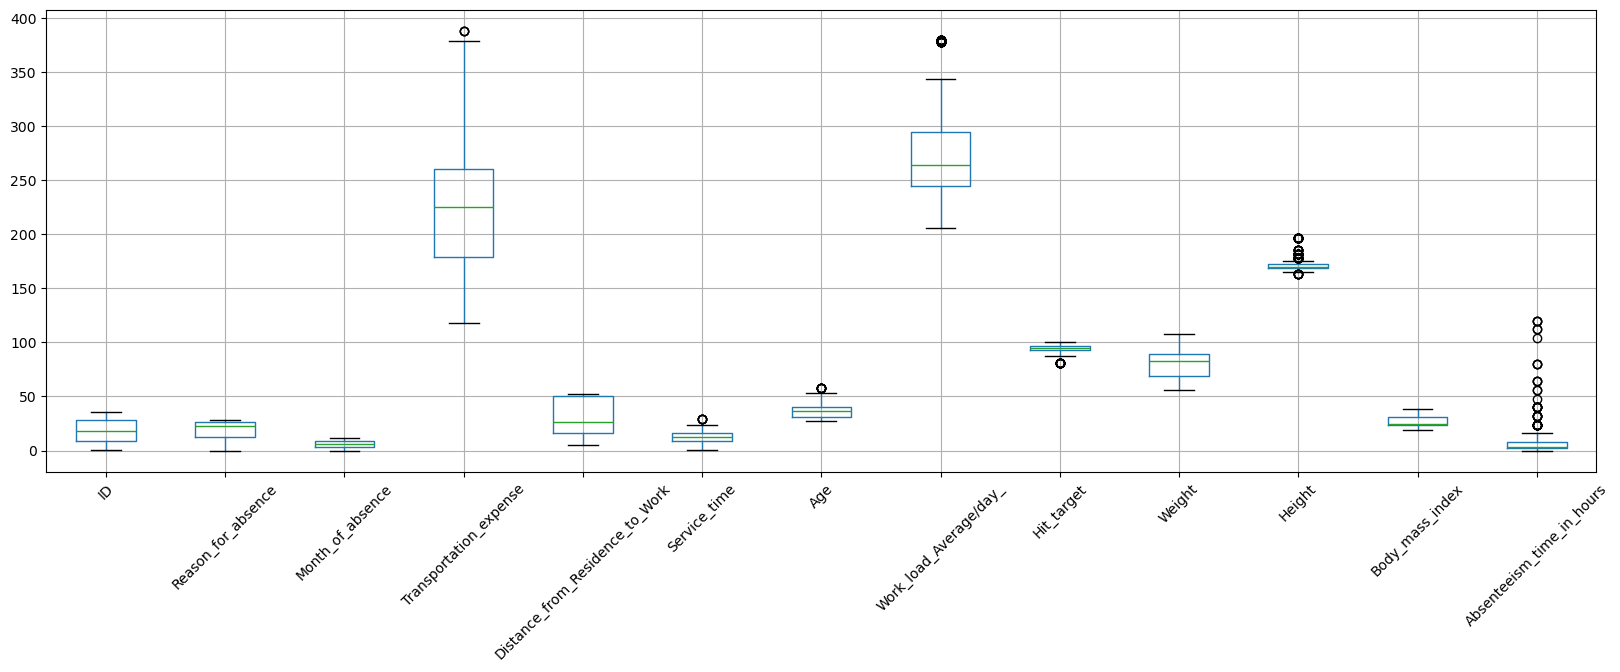

In [24]:
df.boxplot()
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20,6)
plt.show()

# usimg winzoration removing outliers

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average/day_           740 non-null    float64 
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    category
 12  Educatio

In [31]:
def iqr_winzorization(df,thresh=1.5):
    df_out=df.copy()
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        q1=df_out[col].quantile(0.25)
        q3=df_out[col].quantile(0.75)
        iqr=q3-q1
        lower_fence=q1-thresh*iqr
        upper_fence=q3+thresh*iqr
        df_out.loc[df_out[col]<lower_fence,col]=lower_fence
        df_out.loc[df_out[col]>upper_fence,col]=upper_fence
    return df_out
ddf=pd.DataFrame(df.select_dtypes(exclude='category'))
ddf_df=iqr_winzorization(ddf)

In [33]:
ddf

,ID,Reason_for_absence,Month_of_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,289,36,13,33,239.554,97,90,172,30,4
1,36,0,7,118,13,18,50,239.554,97,98,178,31,0
2,3,23,7,179,51,18,38,239.554,97,89,170,31,2
3,7,7,7,279,5,14,39,239.554,97,68,168,24,4
4,11,23,7,289,36,13,33,239.554,97,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,289,36,13,33,264.604,93,90,172,30,8
736,1,11,7,235,11,14,37,264.604,93,88,172,29,4
737,4,0,0,118,14,13,40,271.219,95,98,170,34,0
738,8,0,0,231,35,14,39,271.219,95,100,170,35,0


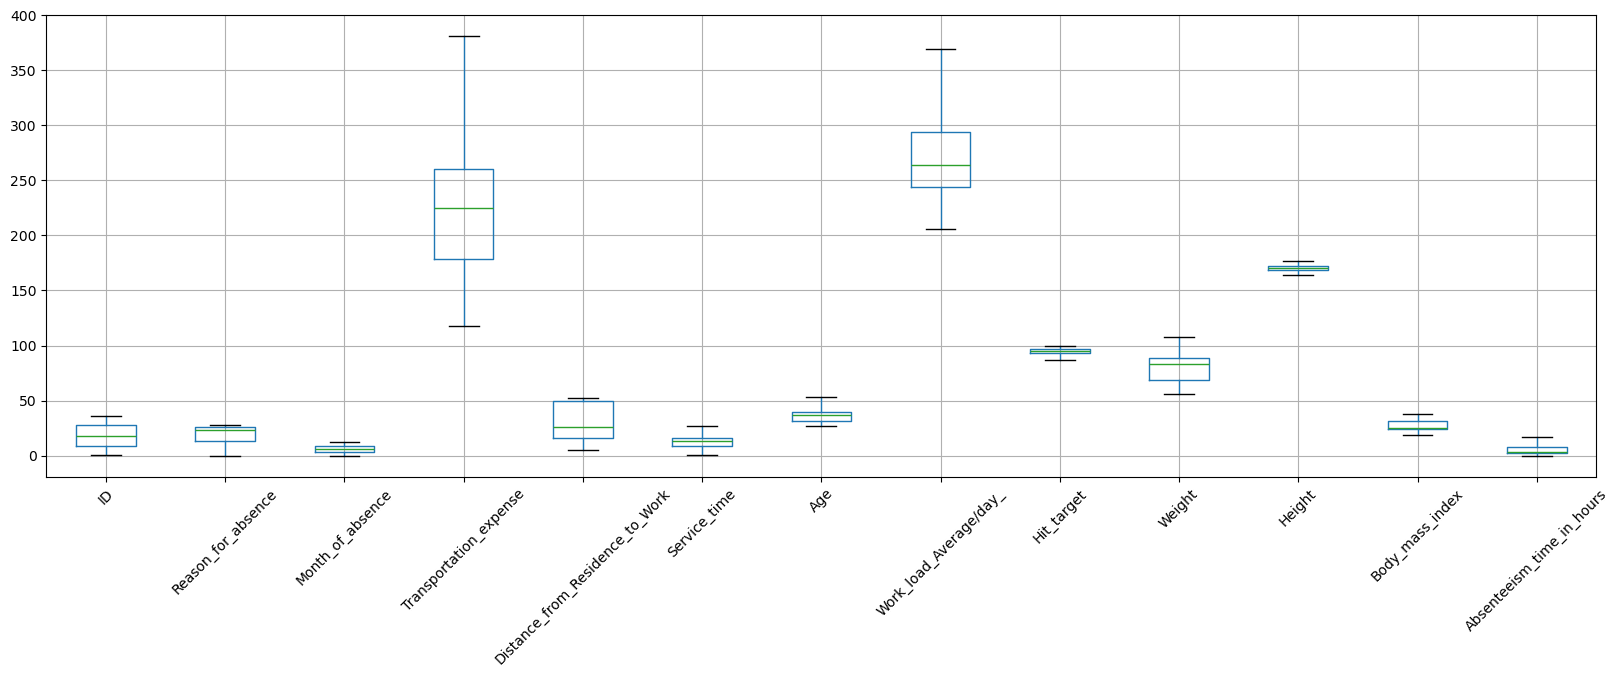

In [35]:
ddf_df.boxplot()
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20,6)
plt.show()

# outliers are removed

In [38]:
# label encode day_of_the_week,
#le = LabelEncoder()

# Fit and transform the data
#encoded_data = le.fit_transform(data)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
jy=df.select_dtypes(include='category')
le=LabelEncoder()
for x in jy:
    ddf_df[f'{x}_enc']=df[x]
    ddf_df[f'{x}_enc']=le.fit_transform(ddf_df[f'{x}_enc'])
    

In [44]:
ddf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason_for_absence               740 non-null    float64
 2   Month_of_absence                 740 non-null    int64  
 3   Transportation_expense           740 non-null    float64
 4   Distance_from_Residence_to_Work  740 non-null    int64  
 5   Service_time                     740 non-null    float64
 6   Age                              740 non-null    float64
 7   Work_load_Average/day_           740 non-null    float64
 8   Hit_target                       740 non-null    int64  
 9   Weight                           740 non-null    int64  
 10  Height                           740 non-null    float64
 11  Body_mass_index                  740 non-null    float64
 12  Absenteeism_time_in_ho

# performing data scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
cols=ddf_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(ddf_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

,ID,Reason_for_absence,Month_of_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,...,Body_mass_index,Absenteeism_time_in_hours,Day_of_the_week_enc,Seasons_enc,Disciplinary_failure_enc,Education_enc,Son_enc,Social_drinker_enc,Social_smoker_enc,Pet_enc
0,-0.637161,0.804938,0.196763,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.851673,...,0.775932,-0.233397,0.682924,0.476306,-0.239046,-0.077628,1.700655,0.872872,-0.280566,-1.972548
1,1.632719,-2.280124,0.196763,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,1.473056,...,1.009438,-1.123676,0.682924,0.476306,4.183300,-0.077628,0.060936,0.872872,-0.280566,0.424308
2,-1.363523,0.448970,0.196763,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.774000,...,1.009438,-0.678537,1.381905,0.476306,-0.239046,-0.077628,-0.758924,0.872872,-0.280566,0.424308
3,-1.000342,-1.449530,0.196763,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,-0.857131,...,-0.625100,-0.233397,-0.016058,0.476306,-0.239046,-0.077628,1.700655,0.872872,3.564226,0.424308
4,-0.637161,0.448970,0.196763,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.851673,...,0.775932,-0.678537,-0.016058,0.476306,-0.239046,-0.077628,1.700655,0.872872,-0.280566,-1.972548


In [51]:
df_scaled.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_time_in_hours',
       'Day_of_the_week_enc', 'Seasons_enc', 'Disciplinary_failure_enc',
       'Education_enc', 'Son_enc', 'Social_drinker_enc', 'Social_smoker_enc',
       'Pet_enc'],
      dtype='object')

In [53]:
df_scaled.drop(['ID'],axis=1,inplace=True)

In [55]:
df_scaled.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Transportation_expense',
       'Distance_from_Residence_to_Work', 'Service_time', 'Age',
       'Work_load_Average/day_', 'Hit_target', 'Weight', 'Height',
       'Body_mass_index', 'Absenteeism_time_in_hours', 'Day_of_the_week_enc',
       'Seasons_enc', 'Disciplinary_failure_enc', 'Education_enc', 'Son_enc',
       'Social_drinker_enc', 'Social_smoker_enc', 'Pet_enc'],
      dtype='object')

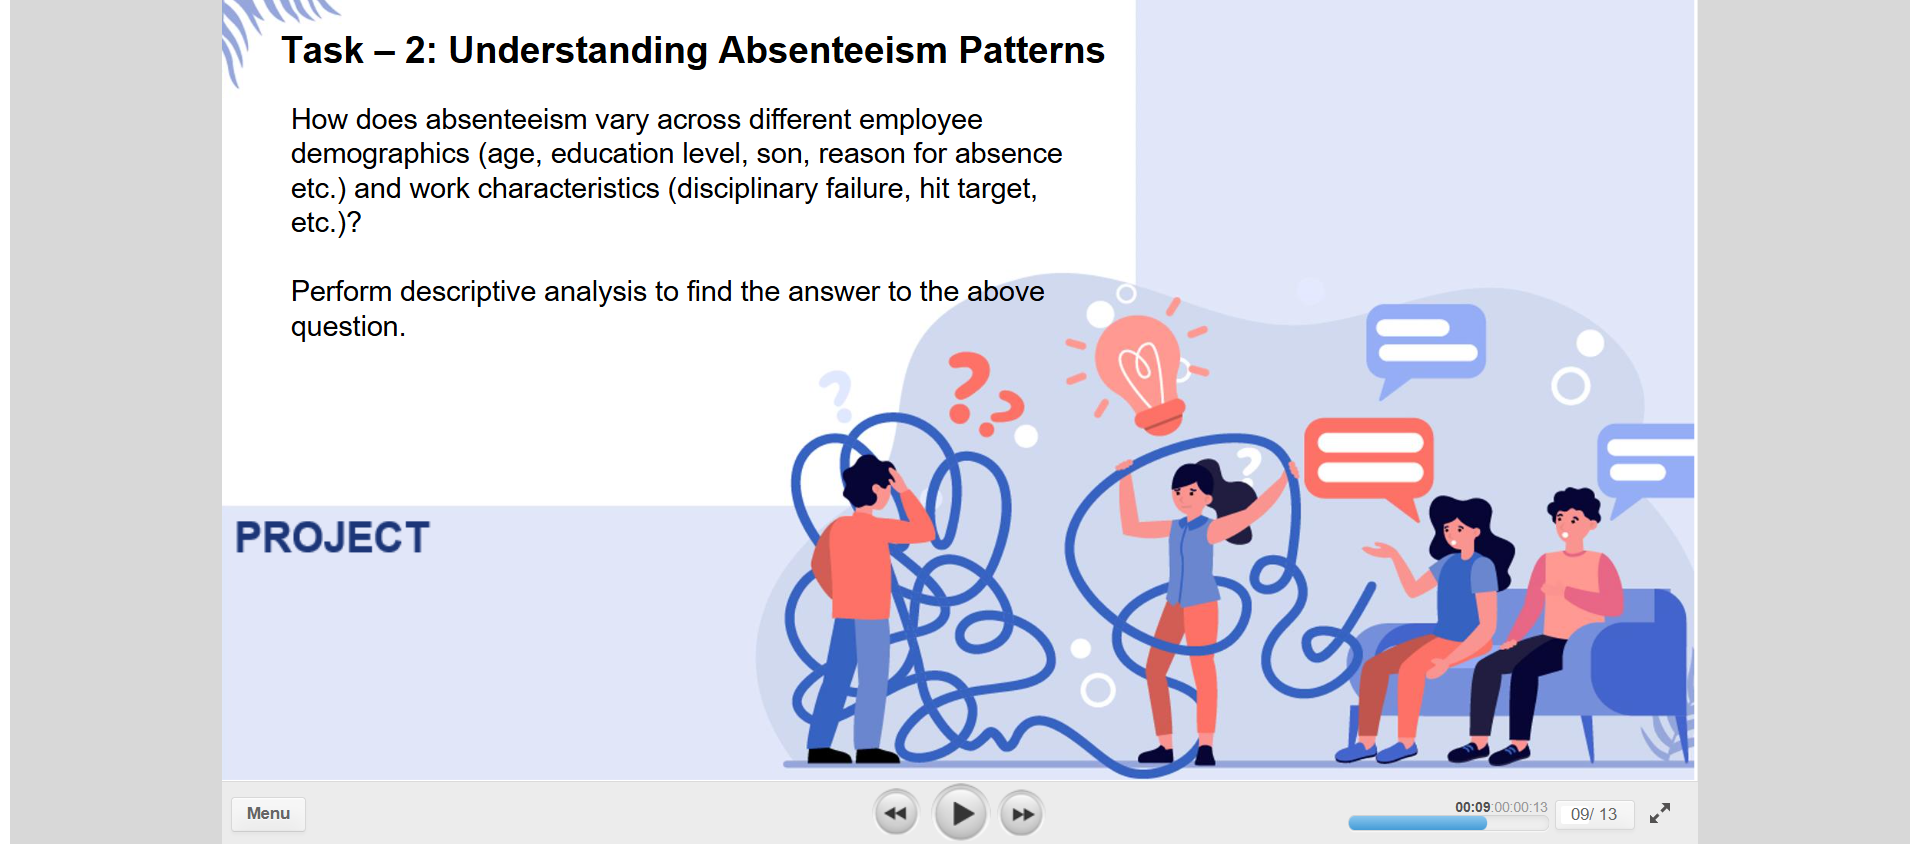

# Analyze absenteeism by different features:
# Demographics:


# Age: Average absence days per age group

In [60]:
ddf_df.columns #'Age','Education','Son','Reason_for_absence', 'Hit_target','Disciplinary_failure_encoder'.

Index(['ID', 'Reason_for_absence', 'Month_of_absence',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_time_in_hours',
       'Day_of_the_week_enc', 'Seasons_enc', 'Disciplinary_failure_enc',
       'Education_enc', 'Son_enc', 'Social_drinker_enc', 'Social_smoker_enc',
       'Pet_enc'],
      dtype='object')

In [62]:
y=round(ddf_df[['Reason_for_absence','Age']].loc[:,'Age'].mean(),2)
print('Average Absentism  age is ',y)

Average Absentism  age is  36.4


# Average Absentism  age is  36.4.

# Education level: Total or average absenteeism by education

In [66]:
c=df[['Reason_for_absence','Education']].loc[:,'Education'].mode()
print(c)

0    high_school
Name: Education, dtype: category
Categories (4, object): [' master_and_doctor', 'graduate', 'high_school', 'postgraduate']


# the Average absenteeism by education level is high school(1).

# Son: Compare absenteeism for employees with vs. without children

In [70]:
without_children=df[df[['Reason_for_absence','Son']].loc[:,'Son']=='no'].Son.count()
with_children=df[df[['Reason_for_absence','Son']].loc[:,'Son']!='no'].Son.count()
t=without_children+with_children

In [72]:
print('the probablity of absentisim of employees who do not have  children is',round(without_children/t*100,2))
print('the probablity of absentisim of employees who have children',round(with_children/t*100,2))


the probablity of absentisim of employees who do not have  children is 40.27
the probablity of absentisim of employees who have children 59.73


# the probablity of absentisim of employees who do not have  children is 40.27
# the probablity of absentisim of employees who have children 59.73
# so the companys has to give the employees who have children benifits like flexible work from home . 

# days with most leaves

In [76]:
df['Day_of_the_week'].mode()

0    Monday
Name: Day_of_the_week, dtype: category
Categories (5, object): ['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']

# 2(Monday) is the day with most holidays by absentist employees.

# Seasons with most leaves

In [80]:
df['Seasons'].mode()

0    Spring
Name: Seasons, dtype: category
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

# 4(Spring ) is the season with the  most leaves

# vizualiztion:


# season vizualiztion:

In [85]:
season=df['Seasons'].value_counts()

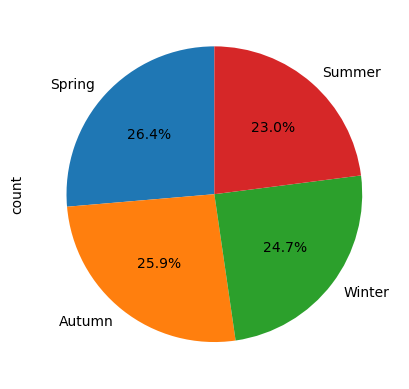

In [87]:
season.plot.pie(autopct='%1.1f%%',startangle=90)
plt.show()

# spring (4) id the season with the most  absentisim(26.4%).All the season's have more than 20% absentisim.summer (1) has the least % absentism  among other seasons with 23.0% employees absent.

# Day_of_the_week vizualization:

In [91]:
dw=df['Day_of_the_week'].value_counts()

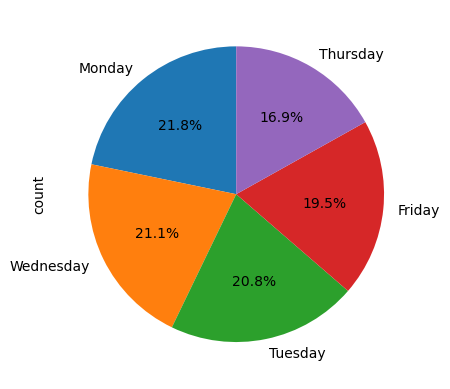

In [93]:
dw.plot.pie(autopct='%1.1f%%',startangle=90)
plt.show()

# Monday is the day with most absentism 21.8%.Thursday has the least % of absentisim 16.9%.

# children vizualization:

In [97]:
son=df['Son'].value_counts()

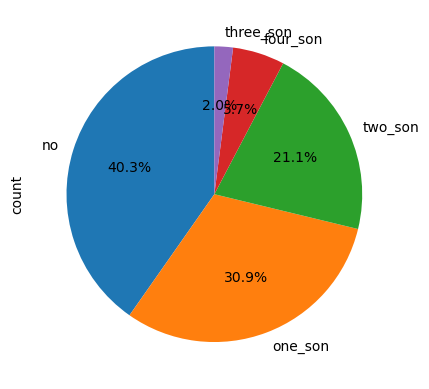

In [99]:
son.plot.pie(autopct='%1.1f%%',startangle=90)
plt.show()

# most people those who are absent do not have children(40.3%).Remaining have 1 or more children.

# Final conclusion:
1) Average Absenteeism Age:The average age of employees with absenteeism is 36.4 years ,suggesting that mid -aged employees are morelikely to be absent than younger or older employees
2) Absenteeism by Education:Employees with only a high education show that the highest absenteeism .
3) Impact on children on Absenteeism:Employees without children account for 40.27% of absenteeism.Employeees eith children make up 59.73% of absenteeeism.
   Recomendation:The company should consider offering flexible working hours or work-from-home options to employees with children to reduce absenteeism.
4) Absenteeism by Day of the Week:
Monday has the highest absenteeism rate at 21.8%.
Thursday has the lowest absenteeism rate at 16.9%.
5) Absenteeism by Season:
   Spring (Season 4) has the highest absenteeism at 26.4%.
   Summer (Season 1) has the lowest at 23.0%.
   All seasons report absenteeism rates above 20%, indicating a year-round issue.


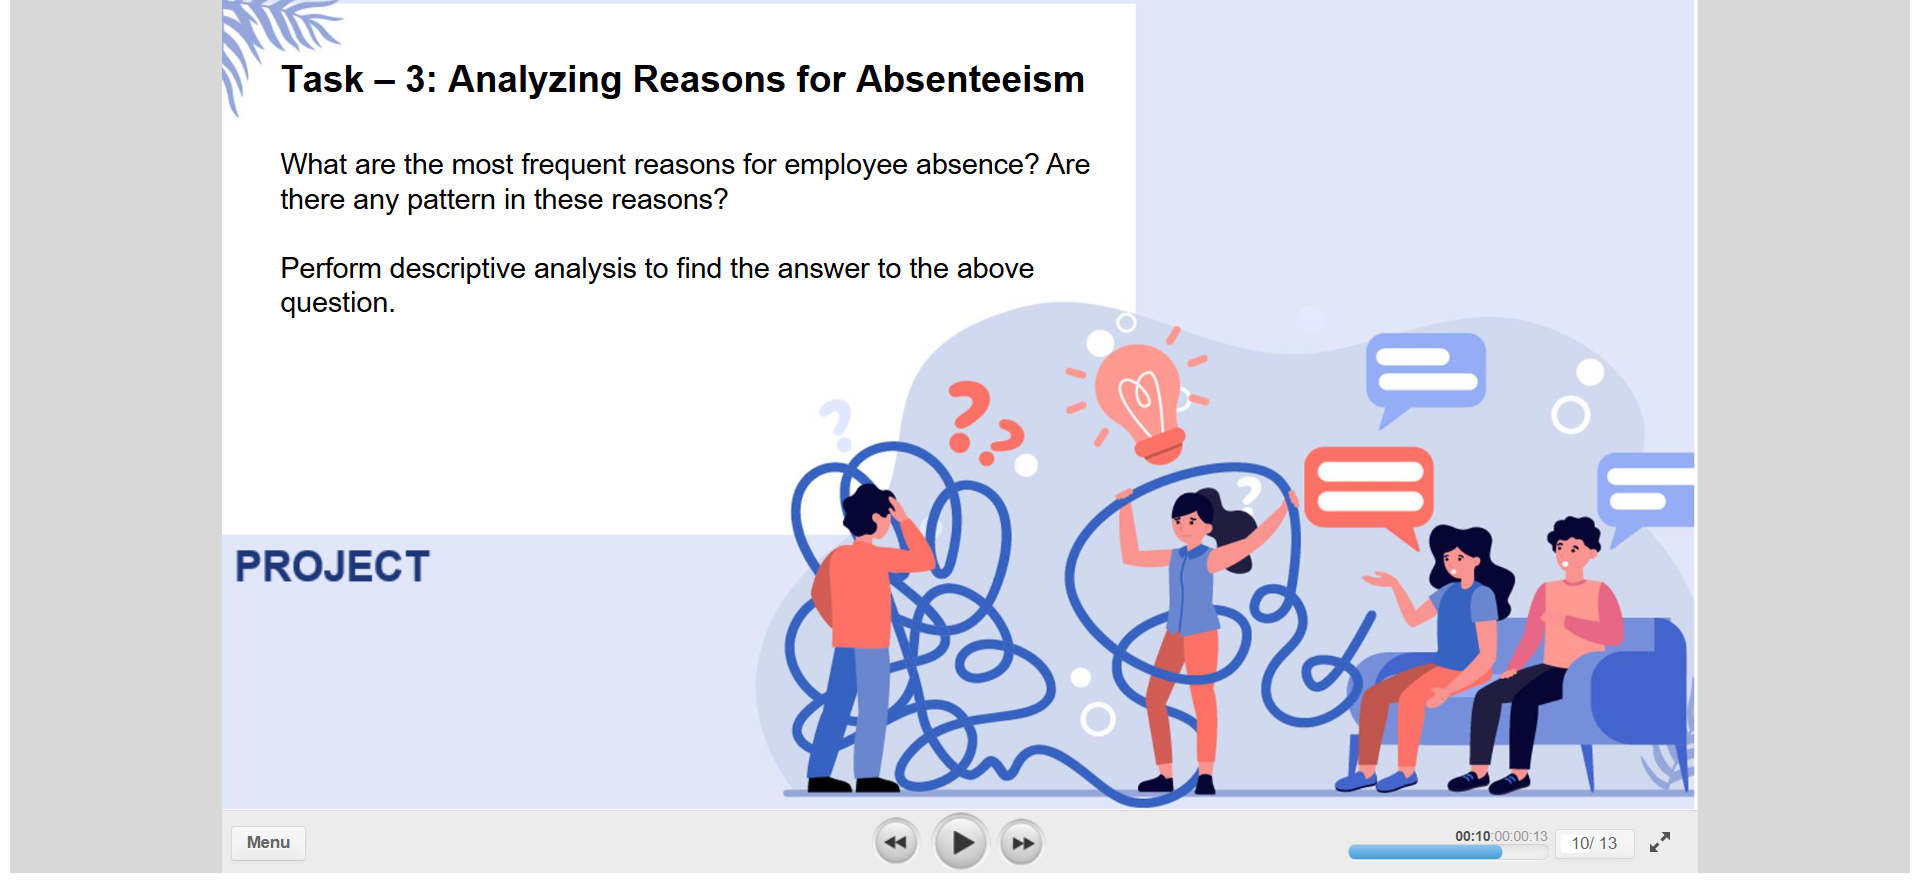

# Work Characteristics:
Reason for absence: Common reasons

In [105]:
ddf_df['Reason_for_absence'].mode()

0    23.0
Name: Reason_for_absence, dtype: float64

# 23('medical consultation') is the most common reason  for absentism.

# #(% of absences per category

In [109]:
xt=pd.DataFrame(ddf_df['Reason_for_absence'].value_counts())
xt.reset_index(inplace=True)
jt=xt['count'].sum()
for x in xt['count']:
    xt['% of absences per category']=xt['count']/jt*100
    xt['% of absences per category']= xt['% of absences per category'].round(2)
xt

,Reason_for_absence,count,% of absences per category
0,23.0,149,20.14
1,28.0,112,15.14
2,27.0,69,9.32
3,13.0,55,7.43
4,0.0,43,5.81
5,19.0,40,5.41
6,22.0,38,5.14
7,26.0,33,4.46
8,25.0,31,4.19
9,11.0,26,3.51


# 23(medical consultation ) and 28(dental consultation ) consists of 35% absentism.

# The most frequent reason for absenteeism was 'Disease' or 'Medical Appointments', indicating a need for better health support or wellness programs. 

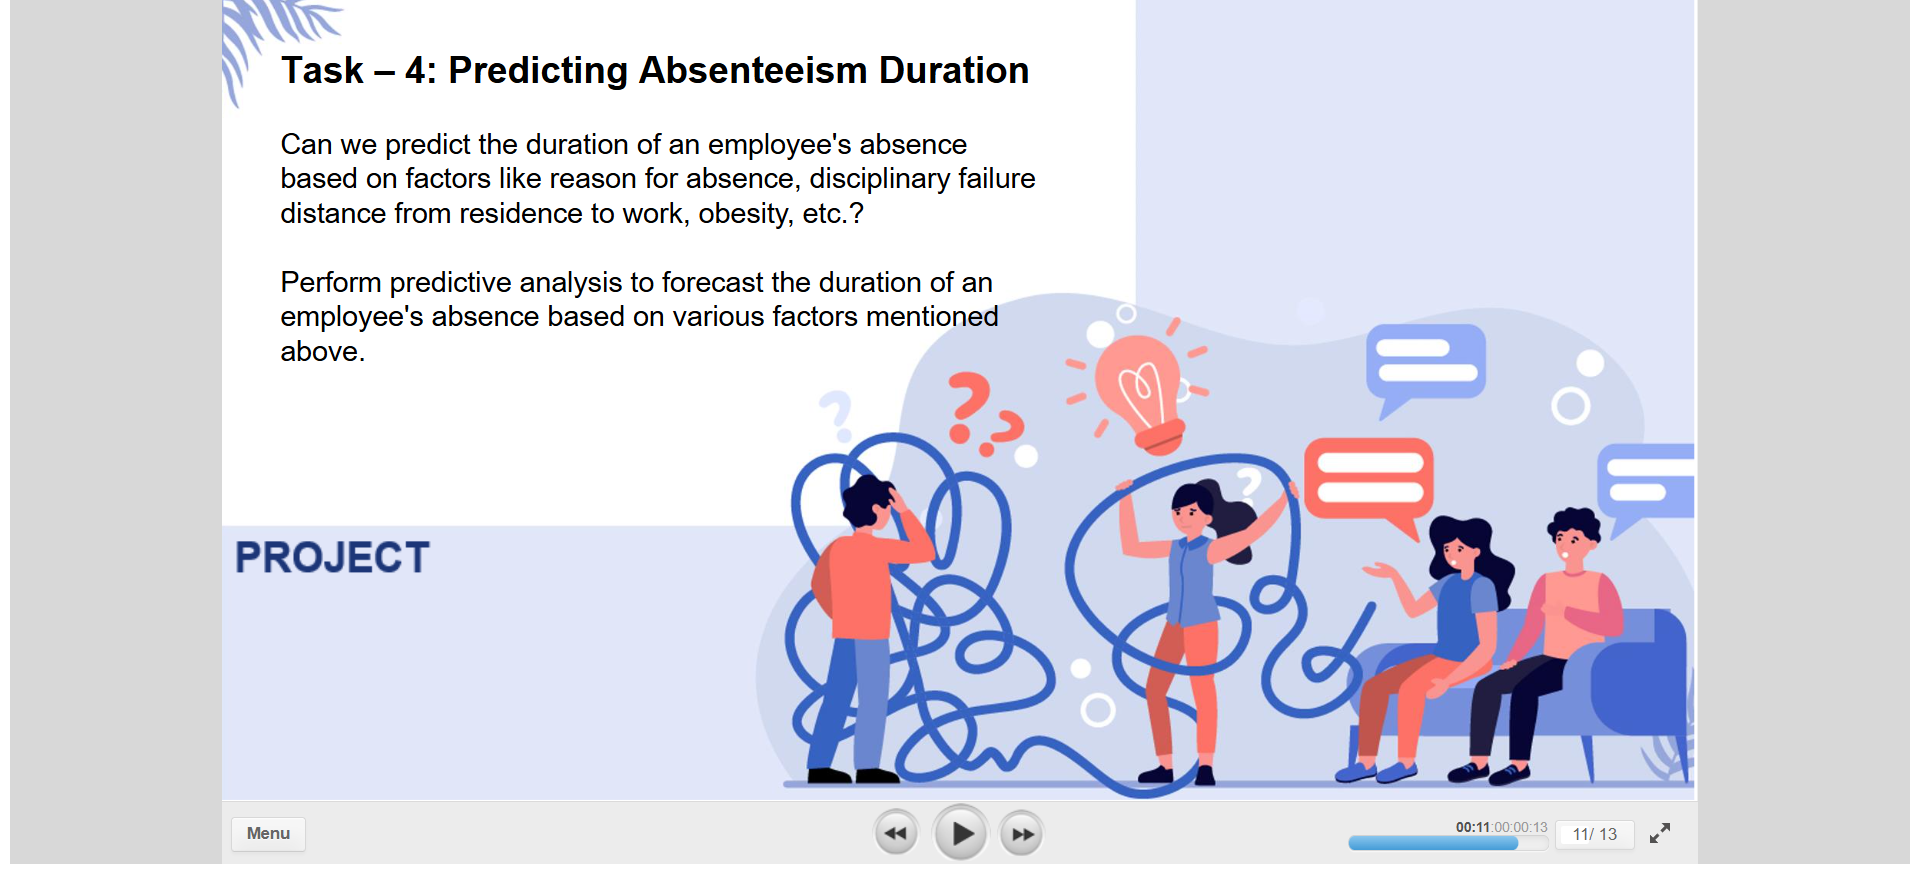

In [114]:
df_scaled.info()#Absenteeism_time_in_hours,Reason_for_absence,Disciplinary_failure_encoder, Distance_from_Residence_to_Work,Weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason_for_absence               740 non-null    float64
 1   Month_of_absence                 740 non-null    float64
 2   Transportation_expense           740 non-null    float64
 3   Distance_from_Residence_to_Work  740 non-null    float64
 4   Service_time                     740 non-null    float64
 5   Age                              740 non-null    float64
 6   Work_load_Average/day_           740 non-null    float64
 7   Hit_target                       740 non-null    float64
 8   Weight                           740 non-null    float64
 9   Height                           740 non-null    float64
 10  Body_mass_index                  740 non-null    float64
 11  Absenteeism_time_in_hours        740 non-null    float64
 12  Day_of_the_week_enc   

# building linear regression model

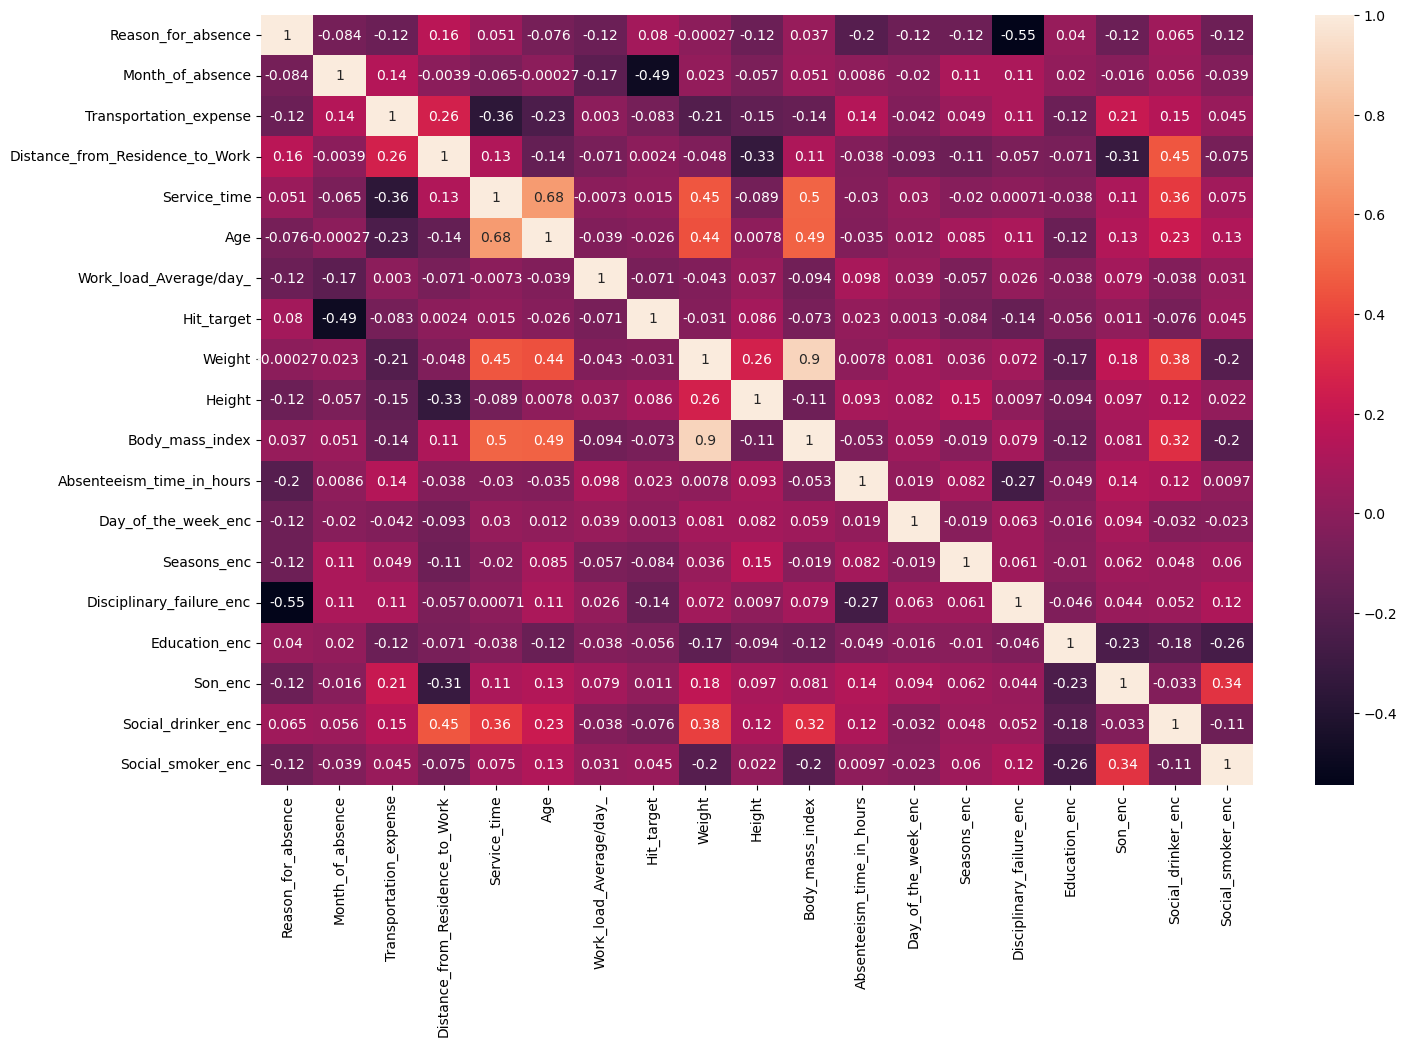

In [143]:
fig,ax=plt.subplots(1,1,figsize=(16,10))
ax=sns.heatmap(df_scaled.iloc[:,:-1].corr(),annot=True)
plt.show()

# the features are not highly correlated so it won't give optimized output.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [155]:
#1
print('.....................1st model.....................')
X4=np.array(df_scaled[['Reason_for_absence']]).reshape((-1,1))#
y4=np.array(df_scaled['Absenteeism_time_in_hours'])#

# splitting the dataset
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=200)
s_model4=LinearRegression().fit(X_train4,y_train4)

# score of trained model
s_model_score4=s_model4.score(X_train4,y_train4)
print('score of trained model',s_model_score4)
# displaying intercept and slope
print('intercept',s_model4.intercept_)
print('Slope',s_model4.coef_)

# predicting on test data
y_pred4=s_model4.predict(X_test4)
#print(y_pred4)

#calculationg mse,mae,rmse,r-2 squared value to acces performance on test data.
mse4=round(mean_squared_error(y_test4,y_pred4),2)
print('mean squared error',mse4)
mae4=round(mean_absolute_error(y_test4,y_pred4),2)
print('mean absolute error',mae4)
rmse4=round(mean_squared_error(y_test4,y_pred4,squared=False),2)
print('root mean squared error',rmse4)
r2_4=round(r2_score(y_test4,y_pred4),2)
print('r2(square) score :',r2_4)
#2
print('.....................2nd model.....................')
X4=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure_enc']]).reshape((-1,2))#
y4=np.array(df_scaled['Absenteeism_time_in_hours'])#

# splitting the dataset
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=200)
s_model4=LinearRegression().fit(X_train4,y_train4)

# score of trained model
s_model_score4=s_model4.score(X_train4,y_train4)
print('score of trained model',s_model_score4)
# displaying intercept and slope
print('intercept',s_model4.intercept_)
print('Slope',s_model4.coef_)

# predicting on test data
y_pred4=s_model4.predict(X_test4)
#print(y_pred4)

#calculationg mse,mae,rmse,r-2 squared value to acces performance on test data.
mse4=round(mean_squared_error(y_test4,y_pred4),2)
print('mean squared error',mse4)
mae4=round(mean_absolute_error(y_test4,y_pred4),2)
print('mean absolute error',mae4)
rmse4=round(mean_squared_error(y_test4,y_pred4,squared=False),2)
print('root mean squared error',rmse4)
r2_4=round(r2_score(y_test4,y_pred4),2)
print('r2(square) score :',r2_4)
#3
print('.....................3rd model.....................')
X4=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure_enc','Distance_from_Residence_to_Work']]).reshape((-1,3))#
y4=np.array(df_scaled['Absenteeism_time_in_hours'])#

# splitting the dataset
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=200)
s_model4=LinearRegression().fit(X_train4,y_train4)

# score of trained model
s_model_score4=s_model4.score(X_train4,y_train4)
print('score of trained model',s_model_score4)
# displaying intercept and slope
print('intercept',s_model4.intercept_)
print('Slope',s_model4.coef_)

# predicting on test data
y_pred4=s_model4.predict(X_test4)
#print(y_pred4)

#calculationg mse,mae,rmse,r-2 squared value to acces performance on test data.
mse4=round(mean_squared_error(y_test4,y_pred4),2)
print('mean squared error',mse4)
mae4=round(mean_absolute_error(y_test4,y_pred4),2)
print('mean absolute error',mae4)
rmse4=round(mean_squared_error(y_test4,y_pred4,squared=False),2)
print('root mean squared error',rmse4)
r2_4=round(r2_score(y_test4,y_pred4),2)
print('r2(square) score :',r2_4)

#4





print('.....................4th model.....................')
X4=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure_enc','Distance_from_Residence_to_Work','Weight']]).reshape((-1,4))#
y4=np.array(df_scaled['Absenteeism_time_in_hours'])#

# splitting the dataset
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=200)
s_model4=LinearRegression().fit(X_train4,y_train4)

# score of trained model
s_model_score4=s_model4.score(X_train4,y_train4)
print('score of trained model',s_model_score4)
# displaying intercept and slope
print('intercept',s_model4.intercept_)
print('Slope',s_model4.coef_)

# predicting on test data
y_pred4=s_model4.predict(X_test4)
#print(y_pred4)

#calculationg mse,mae,rmse,r-2 squared value to acces performance on test data.
mse4=round(mean_squared_error(y_test4,y_pred4),2)
print('mean squared error',mse4)
mae4=round(mean_absolute_error(y_test4,y_pred4),2)
print('mean absolute error',mae4)
rmse4=round(mean_squared_error(y_test4,y_pred4,squared=False),2)
print('root mean squared error',rmse4)
r2_4=round(r2_score(y_test4,y_pred4),2)
print('r2(square) score :',r2_4)






.....................1st model.....................
score of trained model 0.04604775854570187
intercept 0.003480735332536528
Slope [-0.21703995]
mean squared error 0.9
mean absolute error 0.74
root mean squared error 0.95
r2(square) score : 0.01
.....................2nd model.....................
score of trained model 0.24668865623397762
intercept 0.002950685945237759
Slope [-0.50711553 -0.54572065]
mean squared error 0.71
mean absolute error 0.6
root mean squared error 0.84
r2(square) score : 0.22
.....................3rd model.....................
score of trained model 0.2474421488751778
intercept 0.0036524873450590723
Slope [-0.51334449 -0.54791066  0.02851795]
mean squared error 0.71
mean absolute error 0.61
root mean squared error 0.84
r2(square) score : 0.22
.....................4th model.....................
score of trained model 0.2506993103957059
intercept 0.005352490103744589
Slope [-0.51642033 -0.55093518  0.03289782  0.05846708]
mean squared error 0.71
mean absolute err

# The model is not suitable.

# as we increass the features with max features we gotthe same r2_score than previous 2 scores.The error mse,mae,rmse have increased in the latest model.

In [168]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({"Actual":label,"Predictions":predictions})
    df_results['residual'] = abs(df_results['Actual']) - abs(df_results['Predictions'])
    return df_results

def linear_assumption(model, features, label):
    print("Assumption 1: Linear relationship between the target and the feature", '\n')
    print("Checking with a scatter plot of actual Vs predicted","prediction should follow the diagonal line")
    df_results = calculate_residuals(model,features,label)

    sns.lmplot(x = 'Actual',y= 'Predictions',data = df_results,fit_reg = False)

    line_coords = np.arange(df_results.min().min(),df_results.max().max())

    plt.plot(line_coords, line_coords, color = 'darkorange', linestyle = '--')
    
    plt.title('Actual Vs Predicted')
    
    plt.show()

In [170]:
 def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption : Homoscedasticity of error terms','\n')
    print('Residuals should have constant variance')

    df_results = calculate_residuals(model,features,label)

    plt.subplots(figsize = (12,6))

    ax = plt.subplot(111)
    plt.scatter(x = df_results.index, y = df_results.residual)

    plt.plot(np.repeat(0,df_results.index.max()), color = 'darkorange', linestyle = '--')

    plt.title('Residual plot')

    plt.xlabel('Index')

    plt.ylabel('Residuals')
    plt.show()

Assumption : Homoscedasticity of error terms 

Residuals should have constant variance


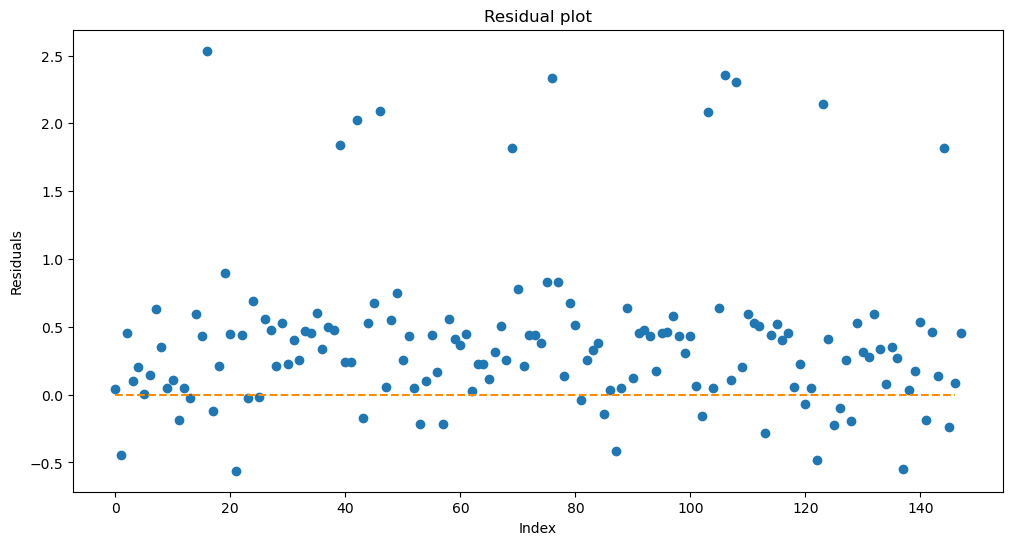

In [172]:
homoscedasticity_assumption(s_model4,X_test4,y_test4)

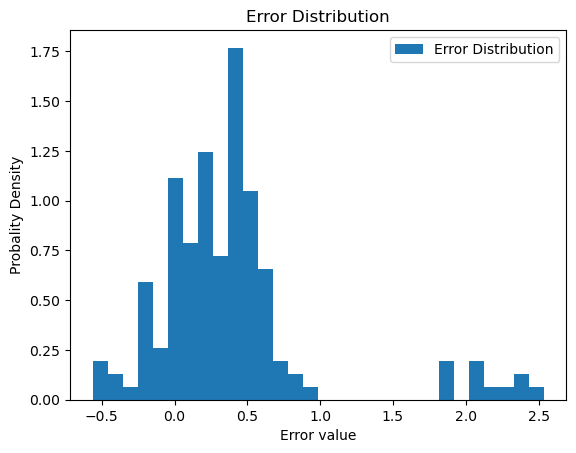

In [174]:
# code to error normality curve
df_results=calculate_residuals(s_model4,X_test4,y_test4)
plt.hist(x=df_results.residual,density=True,bins=30,label='Error Distribution')
plt.xlabel('Error value')
plt.ylabel('Probality Density')
plt.title('Error Distribution')
plt.legend()
plt.show()

# we can see after looking at the graph that increasing no of features the model was  able to perform well than previous models.The r2-score was0.22.The error normality curve showed error peak at 0.4.

# so we can conclude that is a bad model[single and Multiple Linear Regression] for predicting duration of employees absence .

# [-0.51642033 -0.55093518  0.03289782  0.05846708]

# Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ

In [ ]:
Y=0.005352490103744589+-0.51642033X1+ -0.55093518X2+  0.03289782